In [2]:
%%html
<a href="https://www.kaggle.com/c/titanic/data?select=train.csv">Titanic DataSet URL</a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
data=pd.read_csv('titanic.csv')

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
data.shape

(891, 12)

In [38]:
data.drop(['Cabin'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [39]:
data=data.fillna(int(data['Age'].mean()))

In [40]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
data.shape

(891, 12)

<AxesSubplot:>

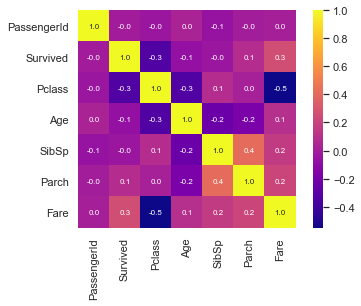

In [42]:
correlation=data.corr()
plt.figure()
sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='plasma')

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


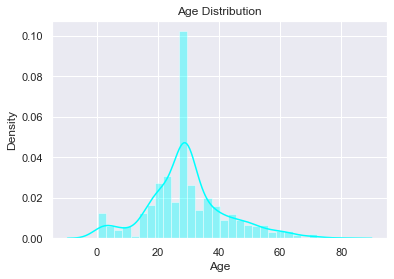

In [43]:
sns.set()
plt.figure()
sns.distplot(data['Age'],color='cyan')
plt.title('Age Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


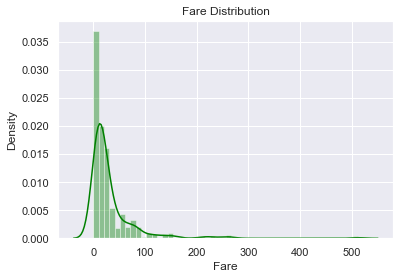

In [44]:
plt.figure()
sns.distplot(data['Fare'],color='green')
plt.title('Fare Distribution')
plt.show()

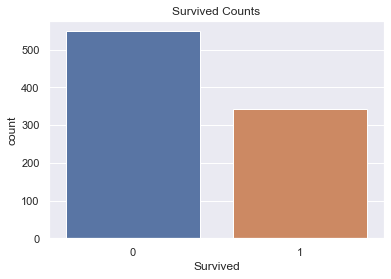

In [45]:
plt.figure()
sns.countplot(x='Survived',data=data)
plt.title('Survived Counts')
plt.show()

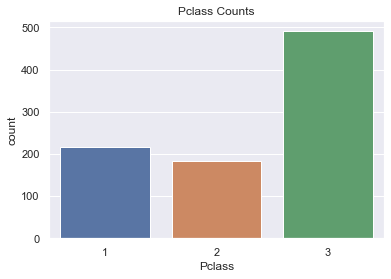

In [46]:
plt.figure()
sns.countplot(x='Pclass',data=data)
plt.title('Pclass Counts')
plt.show()

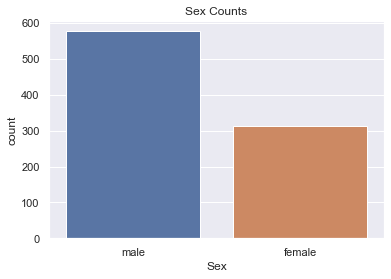

In [47]:
plt.figure()
sns.countplot(x='Sex',data=data)
plt.title('Sex Counts')
plt.show()

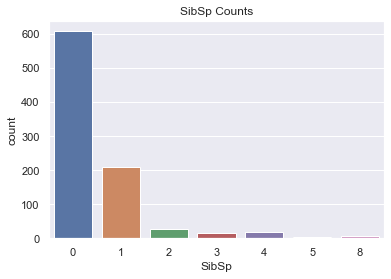

In [48]:
plt.figure()
sns.countplot(x='SibSp',data=data)
plt.title('SibSp Counts')
plt.show()

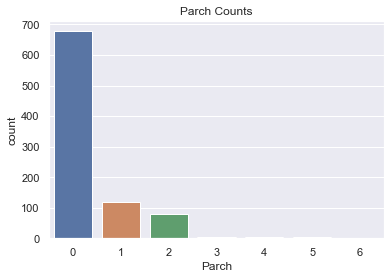

In [49]:
plt.figure()
sns.countplot(x='Parch',data=data)
plt.title('Parch Counts')
plt.show()

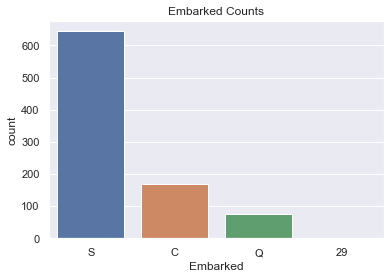

In [50]:
plt.figure()
sns.countplot(x='Embarked',data=data)
plt.title('Embarked Counts')
plt.show()

In [51]:
data.replace({'Sex':{'male':0,'female':1}},inplace=True)
data.replace({'Embarked':{'S':0,'C':1,'Q':2,'29':3}},inplace=True)

In [52]:
data['Embarked'].value_counts()

0     644
1     168
2      77
29      2
Name: Embarked, dtype: int64

In [53]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,29,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,29,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,29,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,W./C. 6607,23.4500,29,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [54]:
data.Cabin.value_counts()

29             687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
B41              1
B3               1
C62 C64          1
B82 B84          1
D15              1
Name: Cabin, Length: 148, dtype: int64

In [60]:
X=data.drop(['Survived','Name','Ticket','Cabin'],axis=1)
Y=data['Survived']

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [62]:
model=LogisticRegression()

In [63]:
model.fit(X_train,Y_train)

D:\AnacondaCompiler\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predictedTrain=model.predict(X_train)
trainingAccuracyScore=accuracy_score(predictedTrain,Y_train)
print("Training Accuracy Score: ",trainingAccuracyScore)

predictedTest=model.predict(X_test)
testingAccuracyScore=accuracy_score(predictedTest,Y_test)
print("Testing Accuracy Score: ",testingAccuracyScore)

Training Accuracy Score:  0.8146067415730337
Testing Accuracy Score:  0.776536312849162


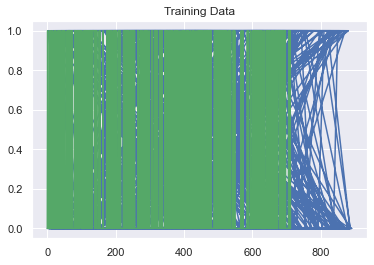

In [65]:
plt.plot(Y_train,color='b',label='Actual Price')
plt.plot(predictedTrain,color='g',label='Predicted Price')
plt.title('Training Data')
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictedTest)
cm

array([[90, 10],
       [30, 49]], dtype=int64)

Text(39.5, 0.5, 'Truth')

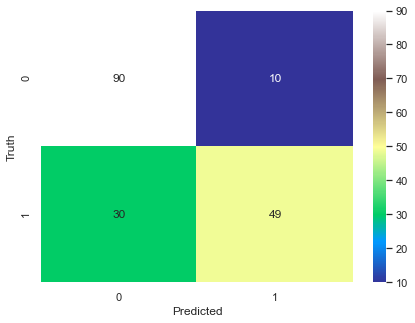

In [68]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True,cmap='terrain')
plt.xlabel('Predicted')
plt.ylabel('Truth')